# Proyek Analisis Data: Bike Sharing Dataset

- Nama: Darrel Danadyaksa Poli
- Email: darrel.danadyaksa19@gmail.com
- id dicoding: [kronosdp](https://www.dicoding.com/users/kronosdp)

## Menentukan Pertanyaan Bisnis

1. Bagaimana cuaca (weathersit) memengaruhi jumlah peminjaman sepeda?
1. Apakah ada perbedaan pola peminjaman sepeda pada hari kerja (workingday) dibandingkan hari libur (holiday)?
1. Apakah musim (season) memengaruhi jumlah penyewaan sepeda?
1. Bagaimana suhu udara (temp) dan tingkat kelembapan (hum) mempengaruhi jumlah peminjaman sepeda?
1. Bagaimana waktu dalam sehari (hr) mempengaruhi jumlah penyewaan sepeda?

In [177]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Wrangling

In [178]:
df_day = pd.read_csv("data/day.csv")
df_hour = pd.read_csv("data/hour.csv")

In [179]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [180]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [181]:
temp = df_day.isna().sum()[df_day.isna().sum() > 0]
print(f"Banyaknya missing value pada dataset day.csv: {len(temp)}")

temp = df_hour.isna().sum()[df_hour.isna().sum() > 0]
print(f"Banyaknya missing value pada dataset hour.csv: {len(temp)}")

Banyaknya missing value pada dataset day.csv: 0
Banyaknya missing value pada dataset hour.csv: 0


In [182]:
print('DataFrame duplication for day.csv:', df_day.duplicated().sum())
print("DataFrame duplication for hour.csv:", df_hour.duplicated().sum())

DataFrame duplication for day.csv: 0
DataFrame duplication for hour.csv: 0


In [183]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [184]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [185]:
df_day.shape, df_hour.shape

((731, 16), (17379, 17))

In [186]:
set(df_day.columns)-set(df_hour.columns)

set()

In [187]:
set(df_hour.columns)-set(df_day.columns)

{'hr'}

In [188]:
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

**Insight:**
- day.csv memiliki mean yang lebih tinggi dari hour.csv padahal day.csv lebih banyak row-nya dari hour.csv
- Kolom pada hour memiliki 1 ekstra kolom yaitu kolom hour

# Data Cleaning

In [189]:
# Convert the 'dteday' column to datetime
df_day["dteday"] = pd.to_datetime(df_day["dteday"])
df_hour["dteday"] = pd.to_datetime(df_hour["dteday"])

# remove columns that are not helpful
df_day = df_day.drop(["instant"], axis=1)
df_hour = df_hour.drop(["instant"], axis=1)

In [190]:
# set the 'dteday' column as the index
df_day = df_day.set_index("dteday")
df_hour = df_hour.set_index("dteday")

# Exploratory Data Analysis (EDA)

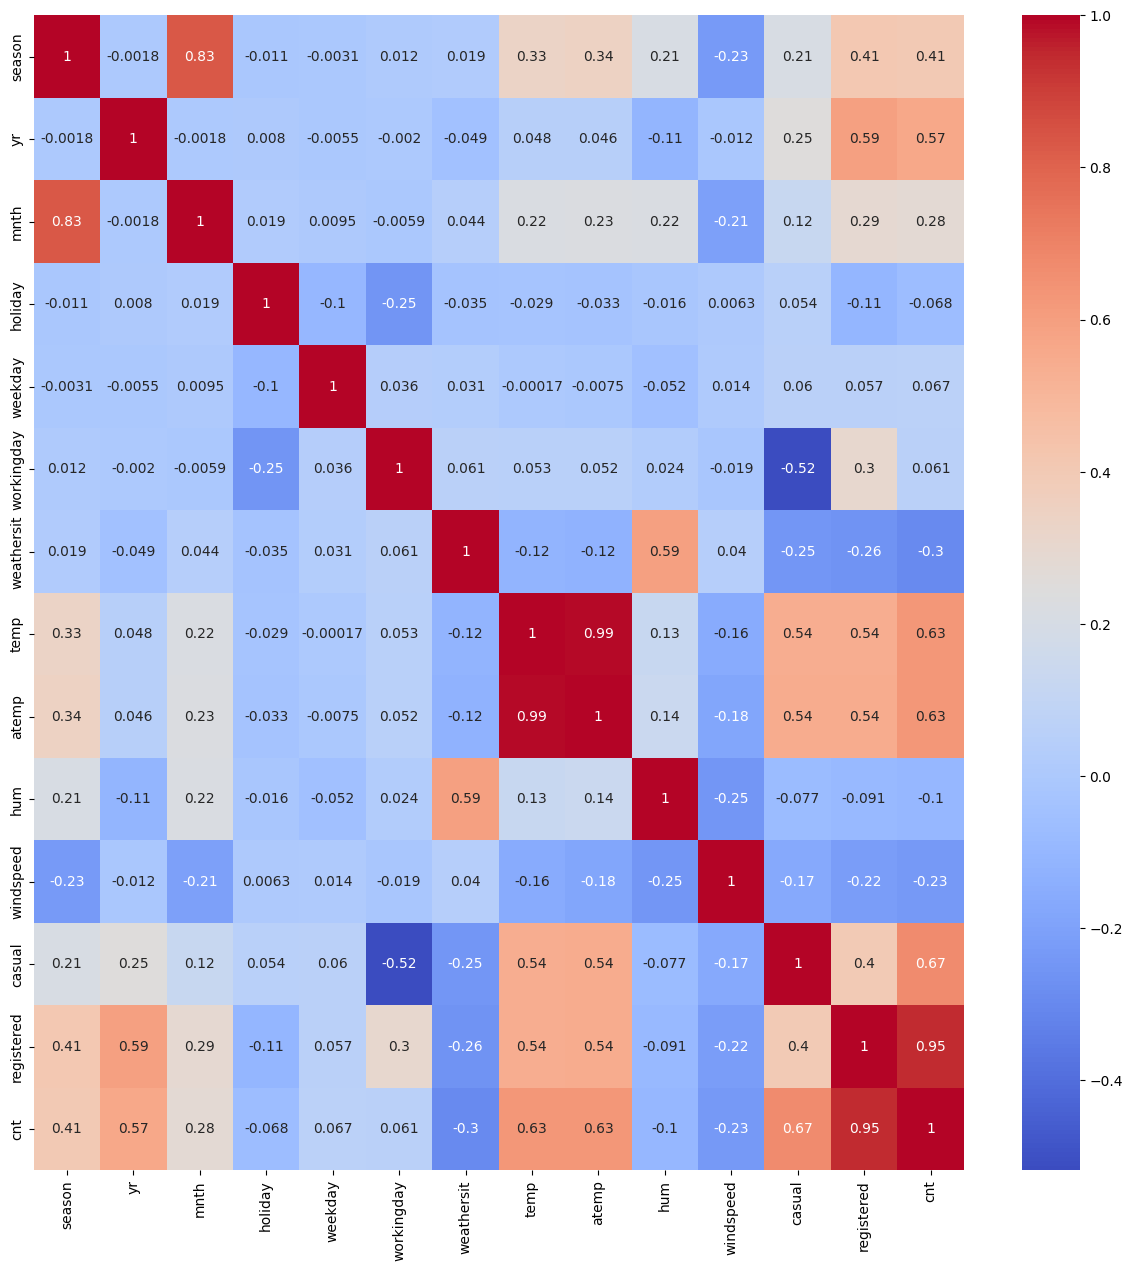

In [191]:
correlation_matrix = df_day.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Visualization & Explanatory Analysis

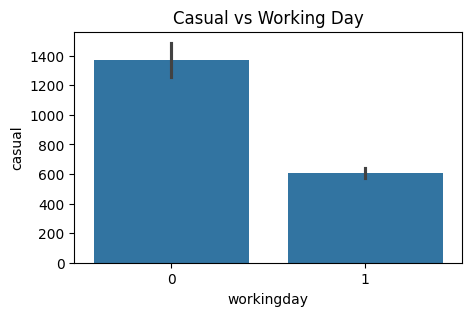

In [192]:
# Bar plot of casual and working day
plt.figure(figsize=(5, 3))
sns.barplot(x='workingday', y='casual', data=df_day)
plt.title('Casual vs Working Day')
plt.show()

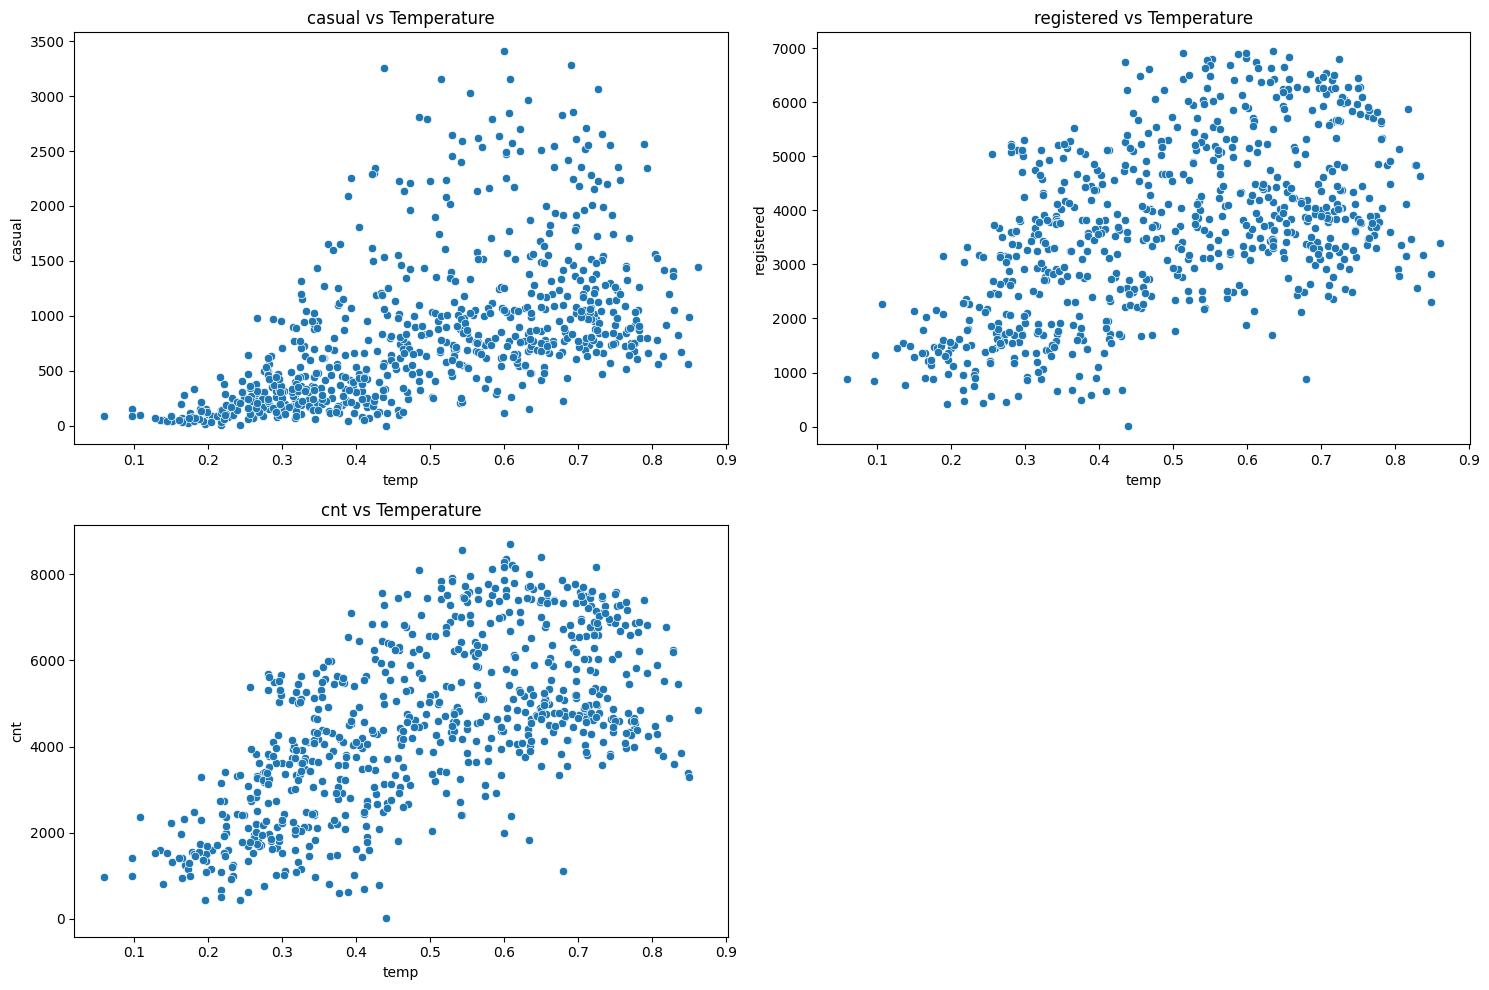

In [193]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

col = ['casual', 'registered', 'cnt']
for idx, i in enumerate(col):
    row = idx // 2
    col = idx % 2
    sns.scatterplot(x='temp', y=i, data=df_day, ax=axs[row, col])
    axs[row, col].set_title(f'{i} vs Temperature')

# Hide the empty subplot
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

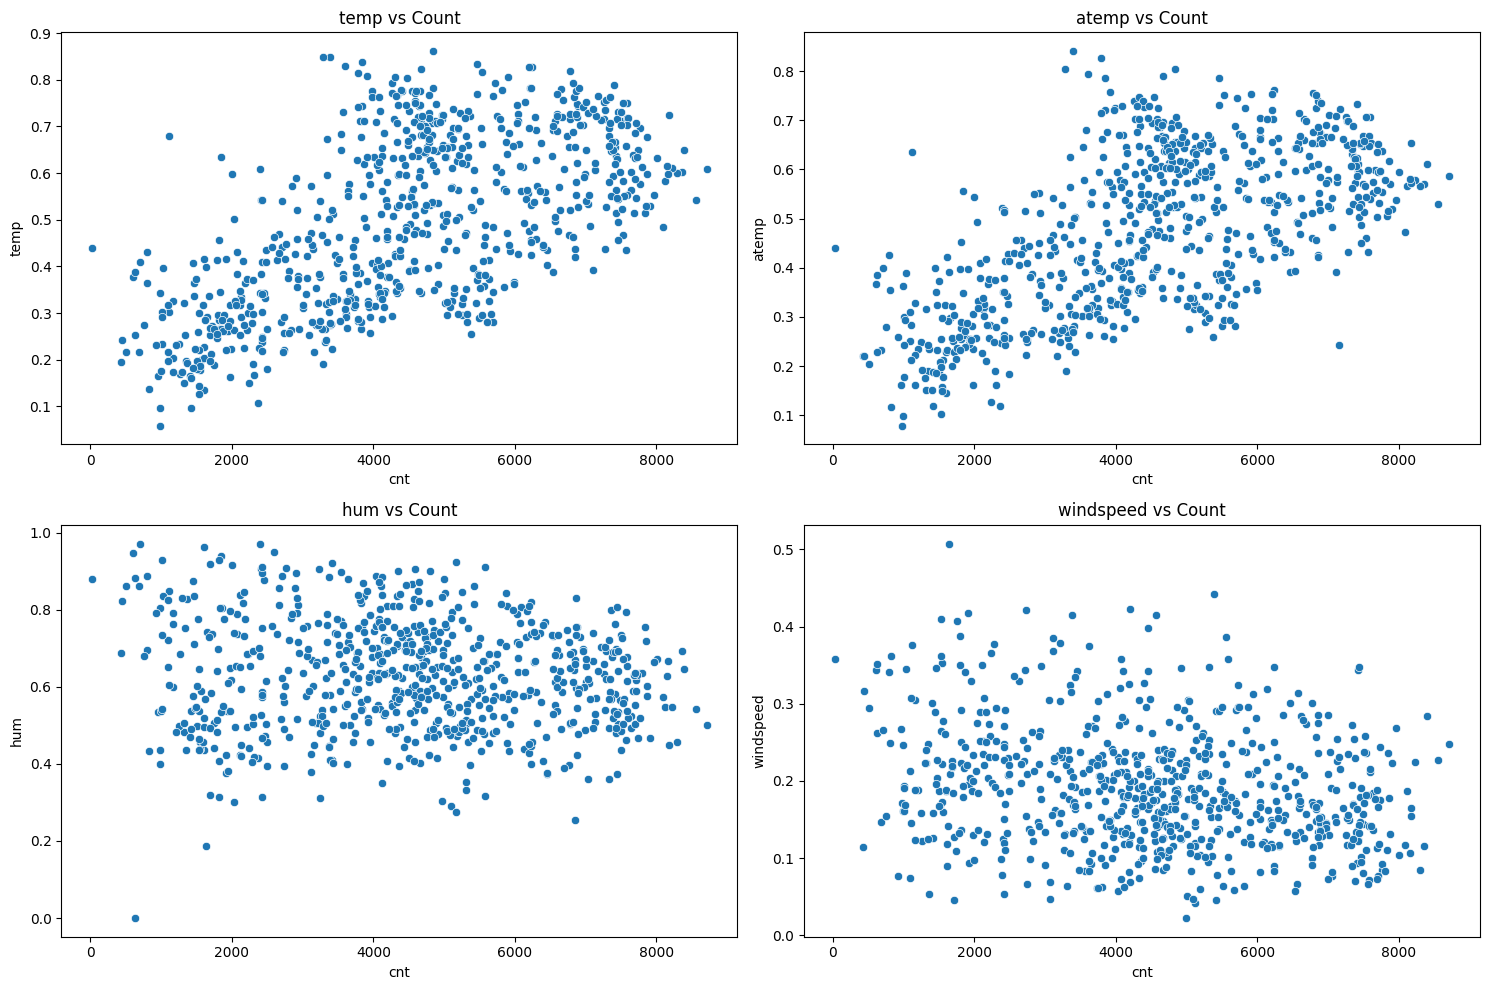

In [194]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

col = ['temp', 'atemp', 'hum', 'windspeed']
for idx, i in enumerate(col):
    row = idx // 2
    col = idx % 2
    sns.scatterplot(x='cnt', y=i, data=df_day, ax=axs[row, col])
    axs[row, col].set_title(f'{i} vs Count')

plt.tight_layout()
plt.show()

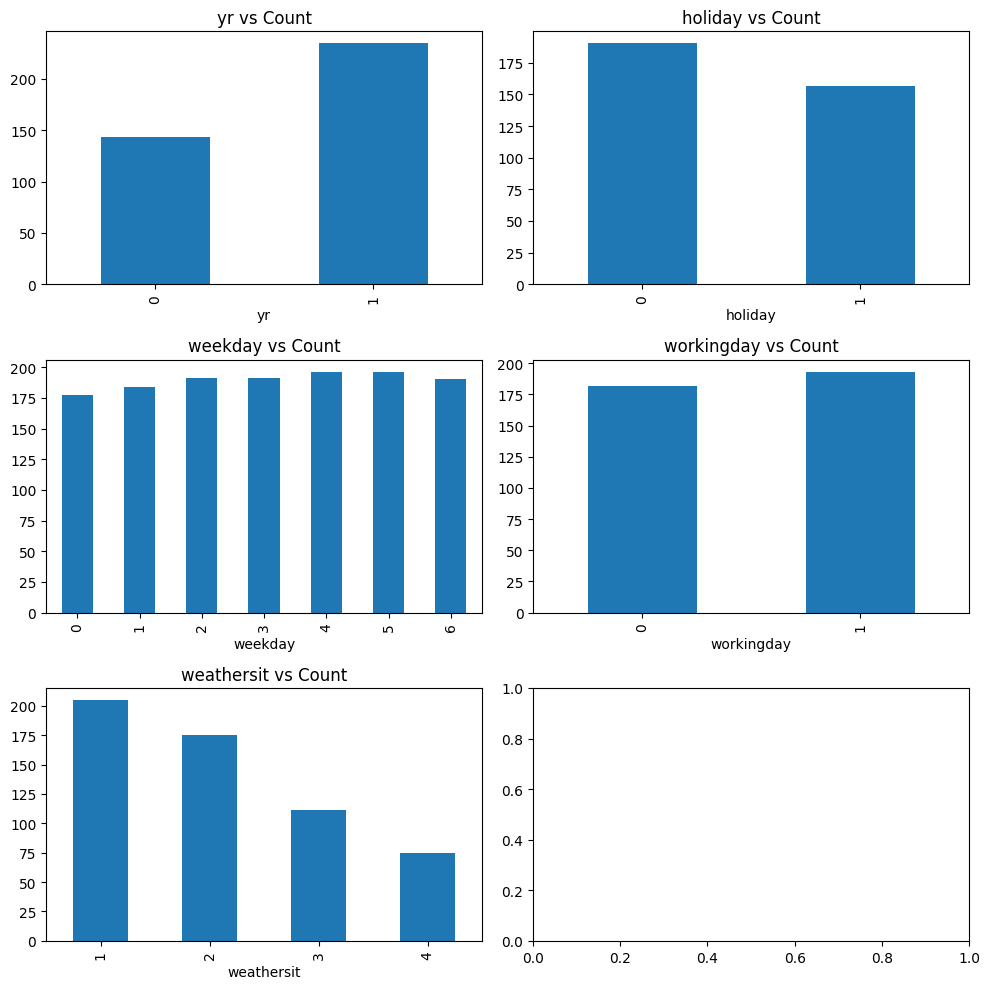

In [195]:
col = ['yr', 'holiday', 'weekday', 'workingday', 'weathersit']

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

for idx, i in enumerate(col):
       row = idx // 2
       col = idx % 2
       axs[row, col].set_title(f'{i} vs Count')
       df_hour.groupby(i).mean()['cnt'].plot(kind='bar', ax=axs[row, col])


plt.tight_layout()
plt.show()

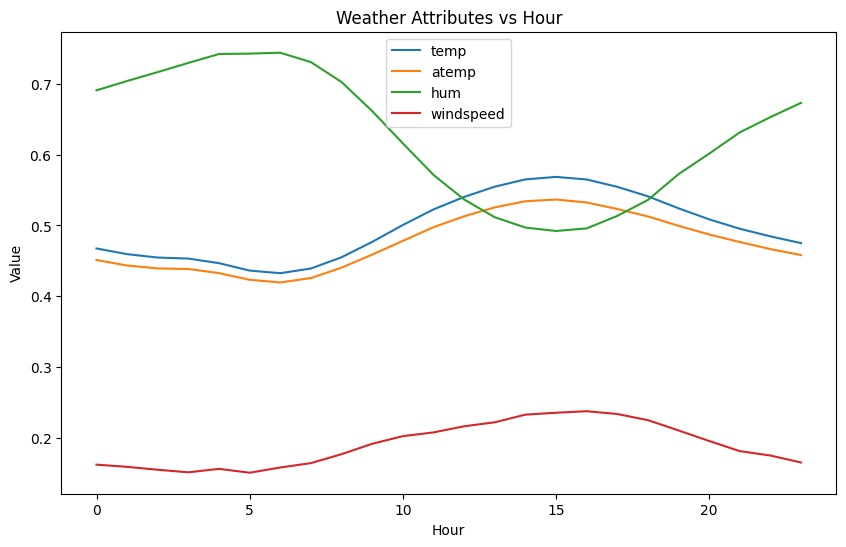

In [196]:
col = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(10, 6))
for i in col:
    df_hour.groupby('hr').mean()[i].plot(kind='line', label=i)
plt.title('Weather Attributes vs Hour')
plt.xlabel('Hour')
plt.ylabel('Value')
plt.legend()
plt.show()

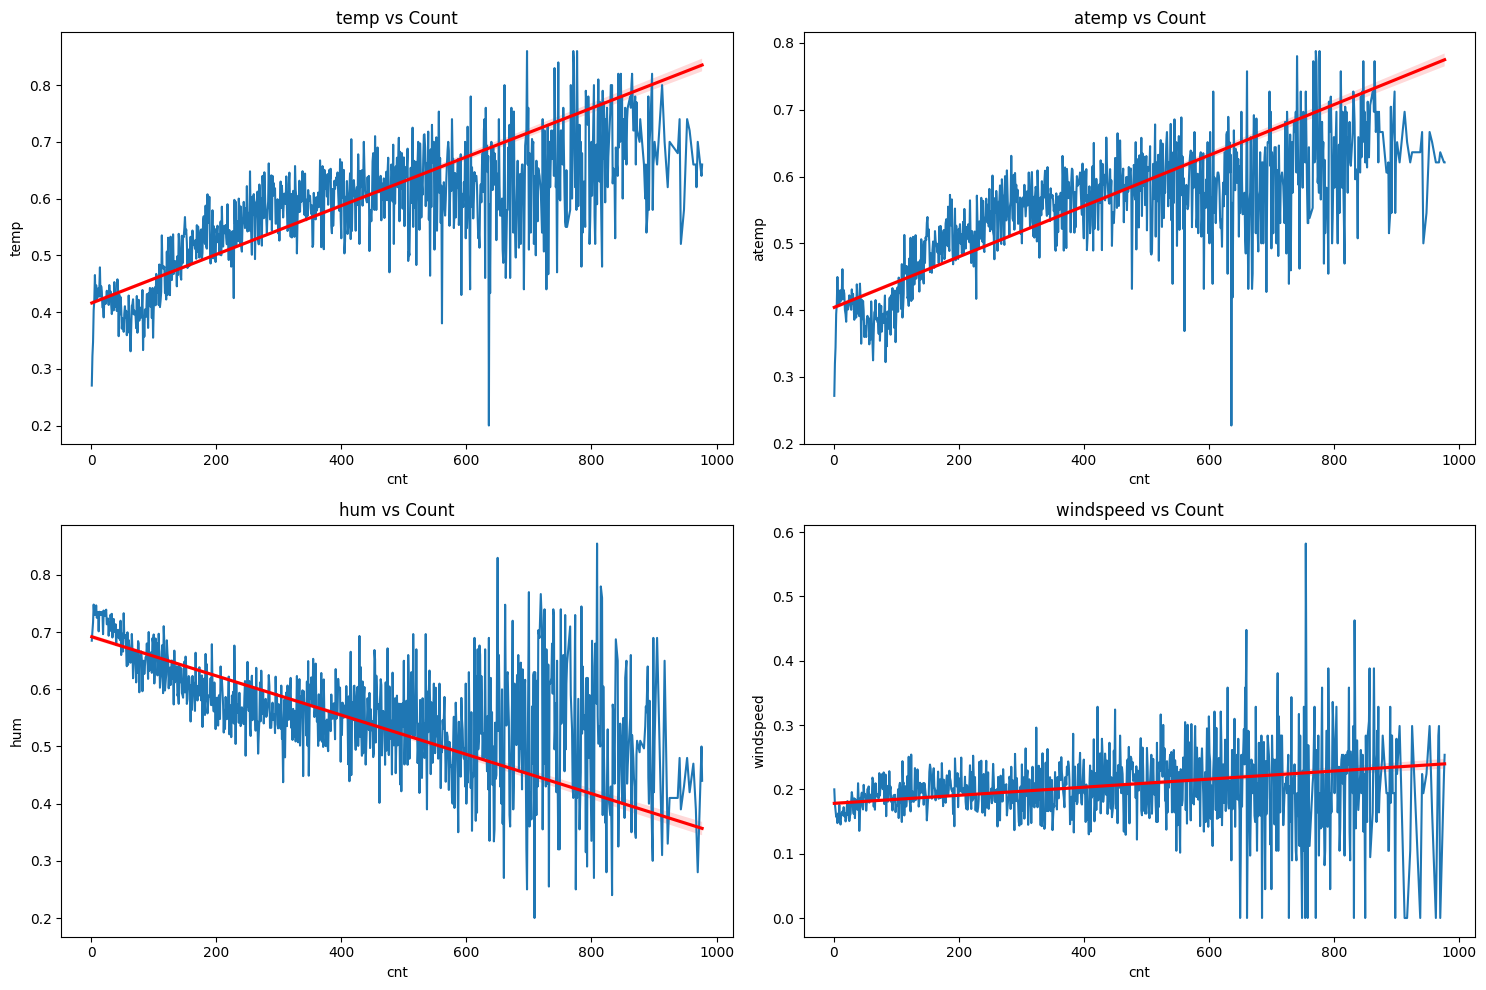

In [197]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for idx, i in enumerate(col):
    row = idx // 2
    col = idx % 2
    axs[row, col].set_title(f'{i} vs Count')

    # Plot the line for the actual data
    df_hour.groupby('cnt').mean()[i].plot(
        kind='line', ax=axs[row, col], label=i)

    # Add regression line using seaborn regplot
    sns.regplot(x='cnt', y=i, data=df_hour,
                ax=axs[row, col], scatter=False, color='r', label='Regression line')

plt.tight_layout()
plt.show()

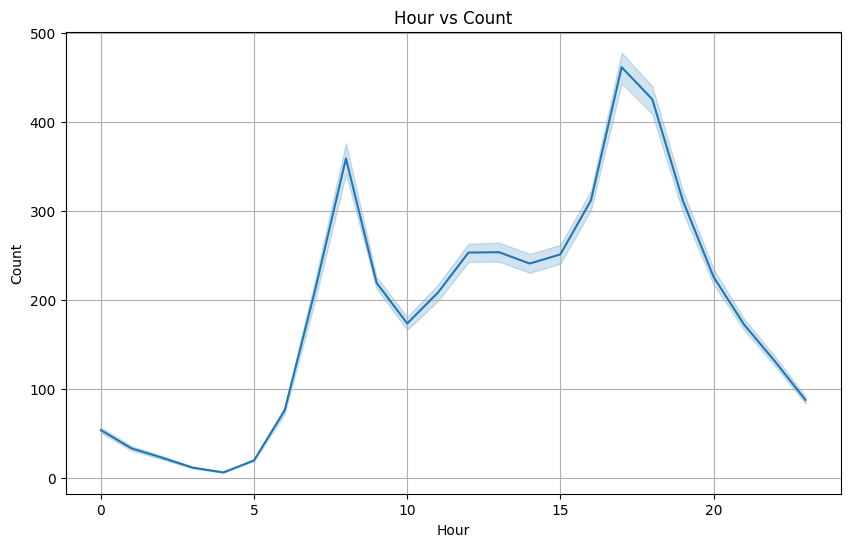

In [198]:
# plot hour and count
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=df_hour)
plt.title('Hour vs Count')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid()
plt.show()

**Insight:**
- Pertama, perhatikan bahwa pada setiap jam temperatur, kelembapan, dan kecepatan angin berubah
- Selanjutnya perhatikan bahwa temp dan atemp memiliki tren yang naik terhadap count. Hal ini berbanding tebalik dengan humidity dimana makin kering udaranya, count akan makin kurang.
- Kenaikan count banyak terjadi pada _rush hour_ yaitu ketika orang pergi bekerja dan ketika orang pulang dari bekerja
- Musim memengaruhi peminjaman

# Teknik analisis lanjutan

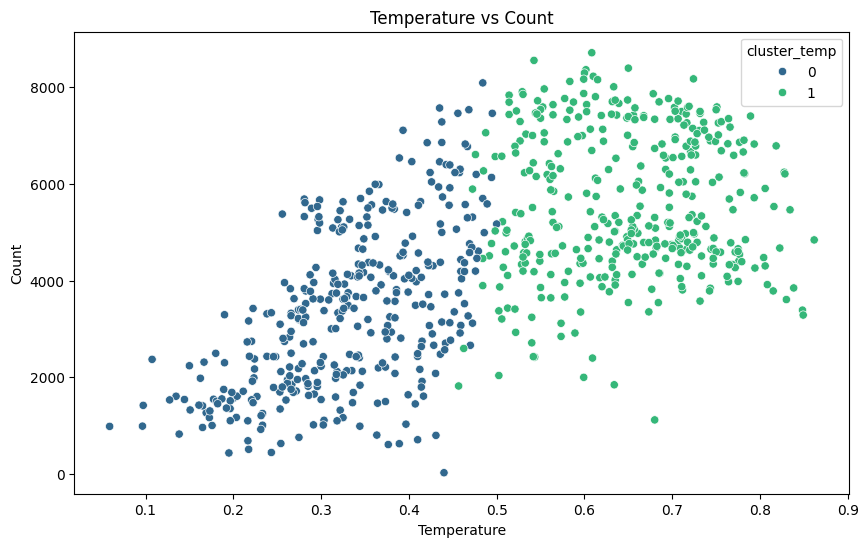

In [216]:
from sklearn.cluster import KMeans

X = df_day[['temp', 'atemp', 'hum', 'windspeed']]

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
df_day['cluster_temp'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_day,
                hue='cluster_temp', palette='viridis')
plt.title('Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

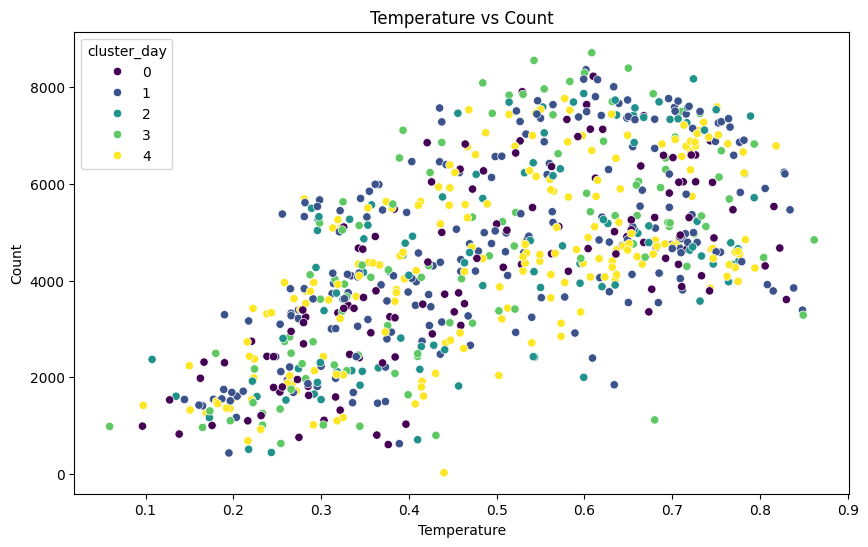

In [215]:
X = df_day[['yr', 'holiday', 'weekday', 'workingday', 'weathersit']]

kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
centers = kmeans.cluster_centers_
labels = kmeans.labels_
df_day['cluster_day'] = labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df_day,
                hue='cluster_day', palette='viridis')
plt.title('Temperature vs Count')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.show()

# Bonus: Model Machine learning

In [104]:
X = df_hour.drop(['cnt', 'casual', 'registered'], axis=1)
y = df_hour['cnt']

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

# LightGBM
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(verbose=-1) 
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
print(f'LightGBM Mean Squared Error: {mse_lgbm}')

# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(f'Gradient Boosting Mean Squared Error: {mse_gbr}')

# AdaBoost
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
mse_ada = mean_squared_error(y_test, y_pred_ada)
print(f'AdaBoost Mean Squared Error: {mse_ada}')

# XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBoost Mean Squared Error: {mse_xgb}')

## Conclusion

Cuaca (weathersit) sangat memengaruhi jumlah peminjaman sepeda, di mana cuaca cerah atau berawan cenderung meningkatkan peminjaman, sementara kondisi buruk seperti hujan dan badai menurunkannya. Selain itu, terdapat perbedaan pola peminjaman sepeda antara hari kerja dan hari libur. Pada hari kerja, peminjaman lebih banyak terjadi saat jam sibuk (rush hour), yaitu ketika orang berangkat dan pulang kerja, sedangkan pada hari libur, jumlah peminjaman cenderung lebih merata sepanjang hari. Musim juga berpengaruh, dengan musim panas dan semi biasanya memiliki angka peminjaman lebih tinggi dibandingkan musim dingin. Suhu udara yang lebih hangat (temp) berhubungan dengan peningkatan jumlah peminjaman sepeda, sedangkan kelembapan tinggi (hum) biasanya mengurangi peminjaman karena kondisi yang lebih lembap dan tidak nyaman. Waktu dalam sehari (hr) juga memengaruhi tren, dengan peningkatan peminjaman yang signifikan terjadi di pagi hari dan sore hari selama jam sibuk.


Pada dasarnya:
1. Bagaimana cuaca (weathersit) memengaruhi jumlah peminjaman sepeda? Iya
1. Apakah ada perbedaan pola peminjaman sepeda pada hari kerja (workingday) dibandingkan hari libur (holiday)? Iya
1. Apakah musim (season) memengaruhi jumlah penyewaan sepeda? Iya
1. Bagaimana suhu udara (temp) dan tingkat kelembapan (hum) mempengaruhi jumlah peminjaman sepeda? Iya
1. Bagaimana waktu dalam sehari (hr) mempengaruhi jumlah penyewaan sepeda? Iya